# Елисеев Е.В.
# Решение Задачи 3 "Кластеризация физической активности"

In [1]:
# иморитирование всех необходимых библиотек
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


df = pd.read_csv("data/Physical_Activity_Monitoring_unlabeled.csv.zip")

df.head()

,timestamp,handTemperature,handAcc16_1,handAcc16_2,handAcc16_3,handAcc6_1,handAcc6_2,handAcc6_3,handGyro1,handGyro2,...,ankleGyro2,ankleGyro3,ankleMagne1,ankleMagne2,ankleMagne3,ankleOrientation1,ankleOrientation2,ankleOrientation3,ankleOrientation4,subject_id
0,252.75,34.8750,0.902847,7.45872,6.032490,1.006100,7.44575,6.303650,-0.021952,0.004114,...,-0.025606,0.030239,-14.5447,27.3336,-5.76620,0.206416,0.348212,0.763201,-0.503652,5
1,3652.45,29.7500,-4.069330,3.76168,8.279720,-5.972500,3.22273,6.908970,0.116054,-0.375968,...,-0.670163,1.786200,-32.8257,-15.7719,-1.31395,0.578332,-0.566734,0.405888,-0.423791,2
2,504.76,34.3750,-2.007540,-9.60180,0.773674,-1.803500,-9.58937,1.073680,0.020131,0.042189,...,-0.009741,-0.006579,-18.8171,16.3089,25.29280,0.139776,0.676586,0.393796,0.606316,8
3,2801.61,31.9375,-13.262200,5.85443,0.899334,-13.611500,5.91511,0.840377,1.715630,-0.050492,...,-0.163470,-3.495570,-26.7418,34.3566,21.32740,0.416303,0.783387,0.306464,0.345075,2
4,441.01,33.5000,-0.013940,8.66540,4.398210,0.144153,8.56816,4.822200,-0.006938,-0.007383,...,-0.028172,-0.003737,-17.7798,-3.9981,10.99500,0.171133,-0.748343,0.252988,-0.588807,6


In [2]:
df.columns

Index(['timestamp', 'handTemperature', 'handAcc16_1', 'handAcc16_2',
       'handAcc16_3', 'handAcc6_1', 'handAcc6_2', 'handAcc6_3', 'handGyro1',
       'handGyro2', 'handGyro3', 'handMagne1', 'handMagne2', 'handMagne3',
       'handOrientation1', 'handOrientation2', 'handOrientation3',
       'handOrientation4', 'chestTemperature', 'chestAcc16_1', 'chestAcc16_2',
       'chestAcc16_3', 'chestAcc6_1', 'chestAcc6_2', 'chestAcc6_3',
       'chestGyro1', 'chestGyro2', 'chestGyro3', 'chestMagne1', 'chestMagne2',
       'chestMagne3', 'chestOrientation1', 'chestOrientation2',
       'chestOrientation3', 'chestOrientation4', 'ankleTemperature',
       'ankleAcc16_1', 'ankleAcc16_2', 'ankleAcc16_3', 'ankleAcc6_1',
       'ankleAcc6_2', 'ankleAcc6_3', 'ankleGyro1', 'ankleGyro2', 'ankleGyro3',
       'ankleMagne1', 'ankleMagne2', 'ankleMagne3', 'ankleOrientation1',
       'ankleOrientation2', 'ankleOrientation3', 'ankleOrientation4',
       'subject_id'],
      dtype='object')

## Исследование данных

In [3]:
df.shape

(534601, 53)

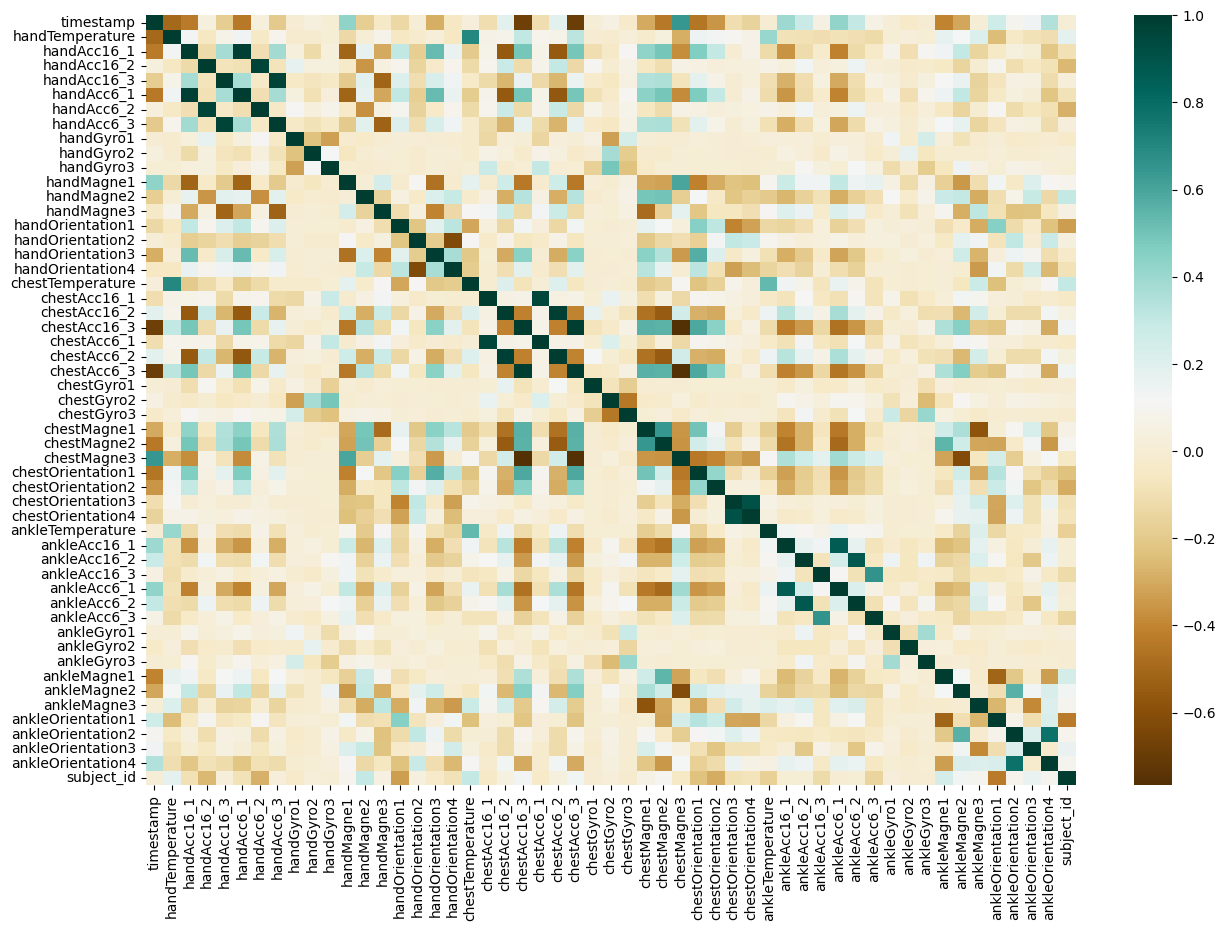

In [4]:
from pandas.plotting import scatter_matrix
import seaborn as sns
import numpy as np

df_corr = df.corr()

f, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(df_corr, mask=np.zeros_like(df_corr, dtype=np.bool_), cmap = "BrBG",ax=ax)
plt.show()

In [5]:
highly_positively_correlated = (df_corr.where(np.triu(np.ones(df_corr.shape), k=1).astype(bool))
                                .stack()
                                .sort_values(ascending=False)
                                .reset_index())
highly_positively_correlated.columns = ['Feature 1', 'Feature 2', 'Correlation']
highly_positively_correlated

,Feature 1,Feature 2,Correlation
0,chestAcc16_3,chestAcc6_3,0.991006
1,chestAcc16_2,chestAcc6_2,0.984728
2,handAcc16_1,handAcc6_1,0.981441
3,handAcc16_3,handAcc6_3,0.972072
4,handAcc16_2,handAcc6_2,0.964042
...,...,...,...
1373,handOrientation2,handOrientation4,-0.627468
1374,timestamp,chestAcc16_3,-0.683643
1375,timestamp,chestAcc6_3,-0.686142
1376,chestAcc16_3,chestMagne3,-0.766114


In [6]:
highly_positively_correlated.head(20)

,Feature 1,Feature 2,Correlation
0,chestAcc16_3,chestAcc6_3,0.991006
1,chestAcc16_2,chestAcc6_2,0.984728
2,handAcc16_1,handAcc6_1,0.981441
3,handAcc16_3,handAcc6_3,0.972072
4,handAcc16_2,handAcc6_2,0.964042
5,chestAcc16_1,chestAcc6_1,0.956092
6,chestOrientation3,chestOrientation4,0.905939
7,ankleAcc16_2,ankleAcc6_2,0.875958
8,ankleAcc16_1,ankleAcc6_1,0.858851
9,ankleOrientation2,ankleOrientation4,0.783064


In [7]:
df.drop(columns=["chestAcc6_3", "chestAcc6_2", "handAcc6_1", "handAcc6_3", "handAcc6_2", "chestAcc6_1", "chestOrientation4", "ankleOrientation4"], inplace=True)

In [8]:
df.isna().sum()

timestamp               0
handTemperature      4041
handAcc16_1          4041
handAcc16_2          4041
handAcc16_3          4041
handGyro1            4041
handGyro2            4041
handGyro3            4041
handMagne1           4041
handMagne2           4041
handMagne3           4041
handOrientation1     4041
handOrientation2     4041
handOrientation3     4041
handOrientation4     4041
chestTemperature      809
chestAcc16_1          809
chestAcc16_2          809
chestAcc16_3          809
chestGyro1            809
chestGyro2            809
chestGyro3            809
chestMagne1           809
chestMagne2           809
chestMagne3           809
chestOrientation1     809
chestOrientation2     809
chestOrientation3     809
ankleTemperature     2546
ankleAcc16_1         2546
ankleAcc16_2         2546
ankleAcc16_3         2546
ankleAcc6_1          2546
ankleAcc6_2          2546
ankleAcc6_3          2546
ankleGyro1           2546
ankleGyro2           2546
ankleGyro3           2546
ankleMagne1 

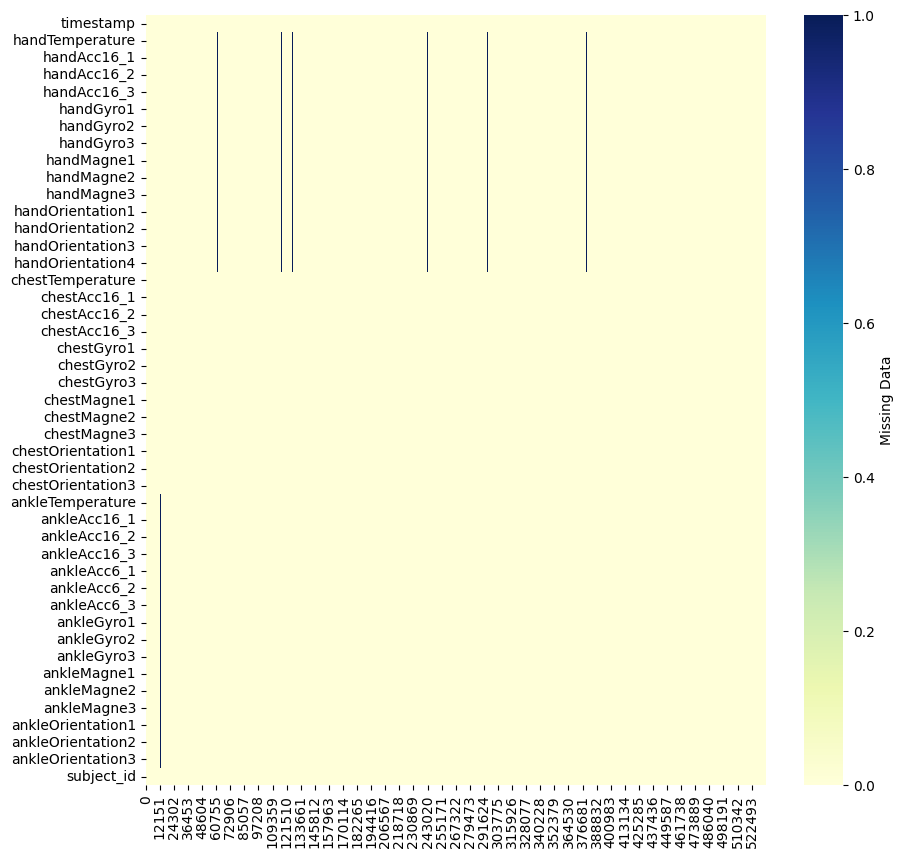

In [9]:
plt.figure(figsize=(10,10))
sns.heatmap(df.isna().transpose(),
            cmap="YlGnBu",
            cbar_kws={'label': 'Missing Data'})
plt.savefig("visualizing_missing_data_with_heatmap_Seaborn_Python.png", dpi=100)

<Axes: >

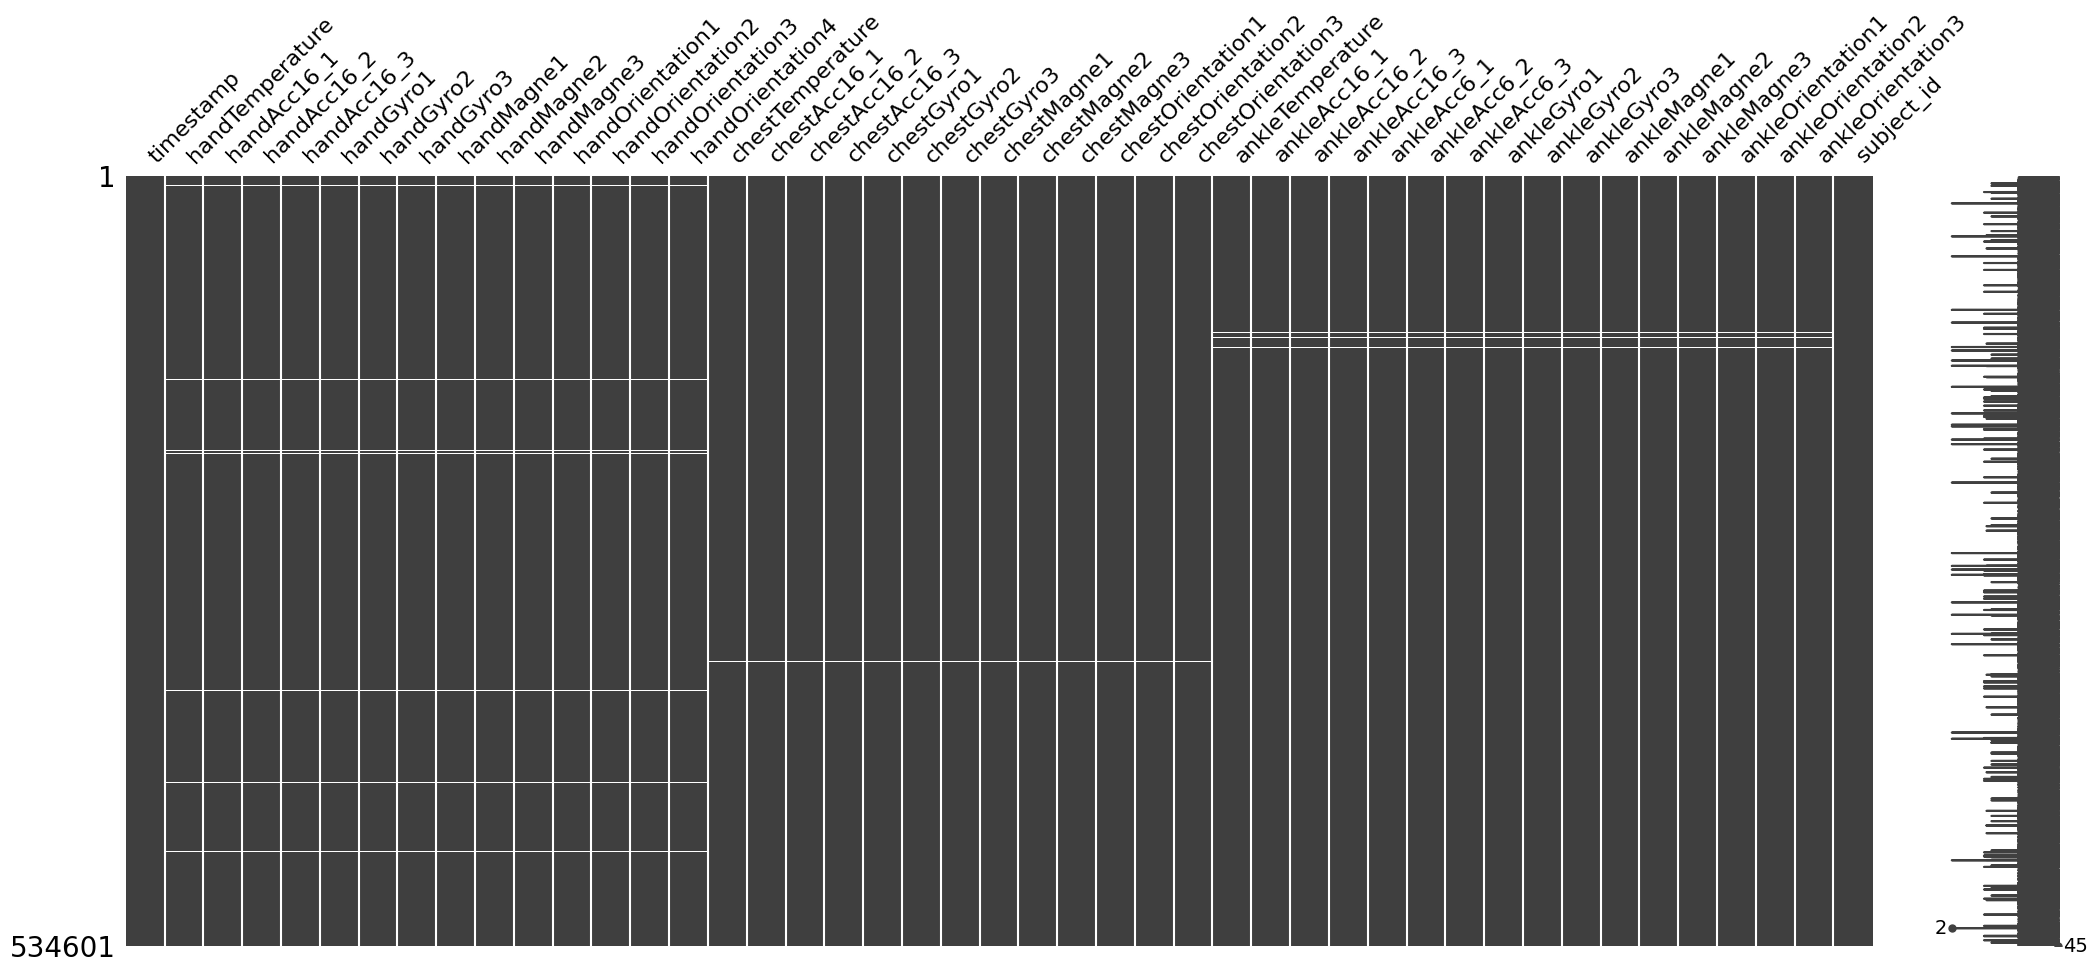

In [10]:
import missingno as msno


msno.matrix(df)

<Axes: >

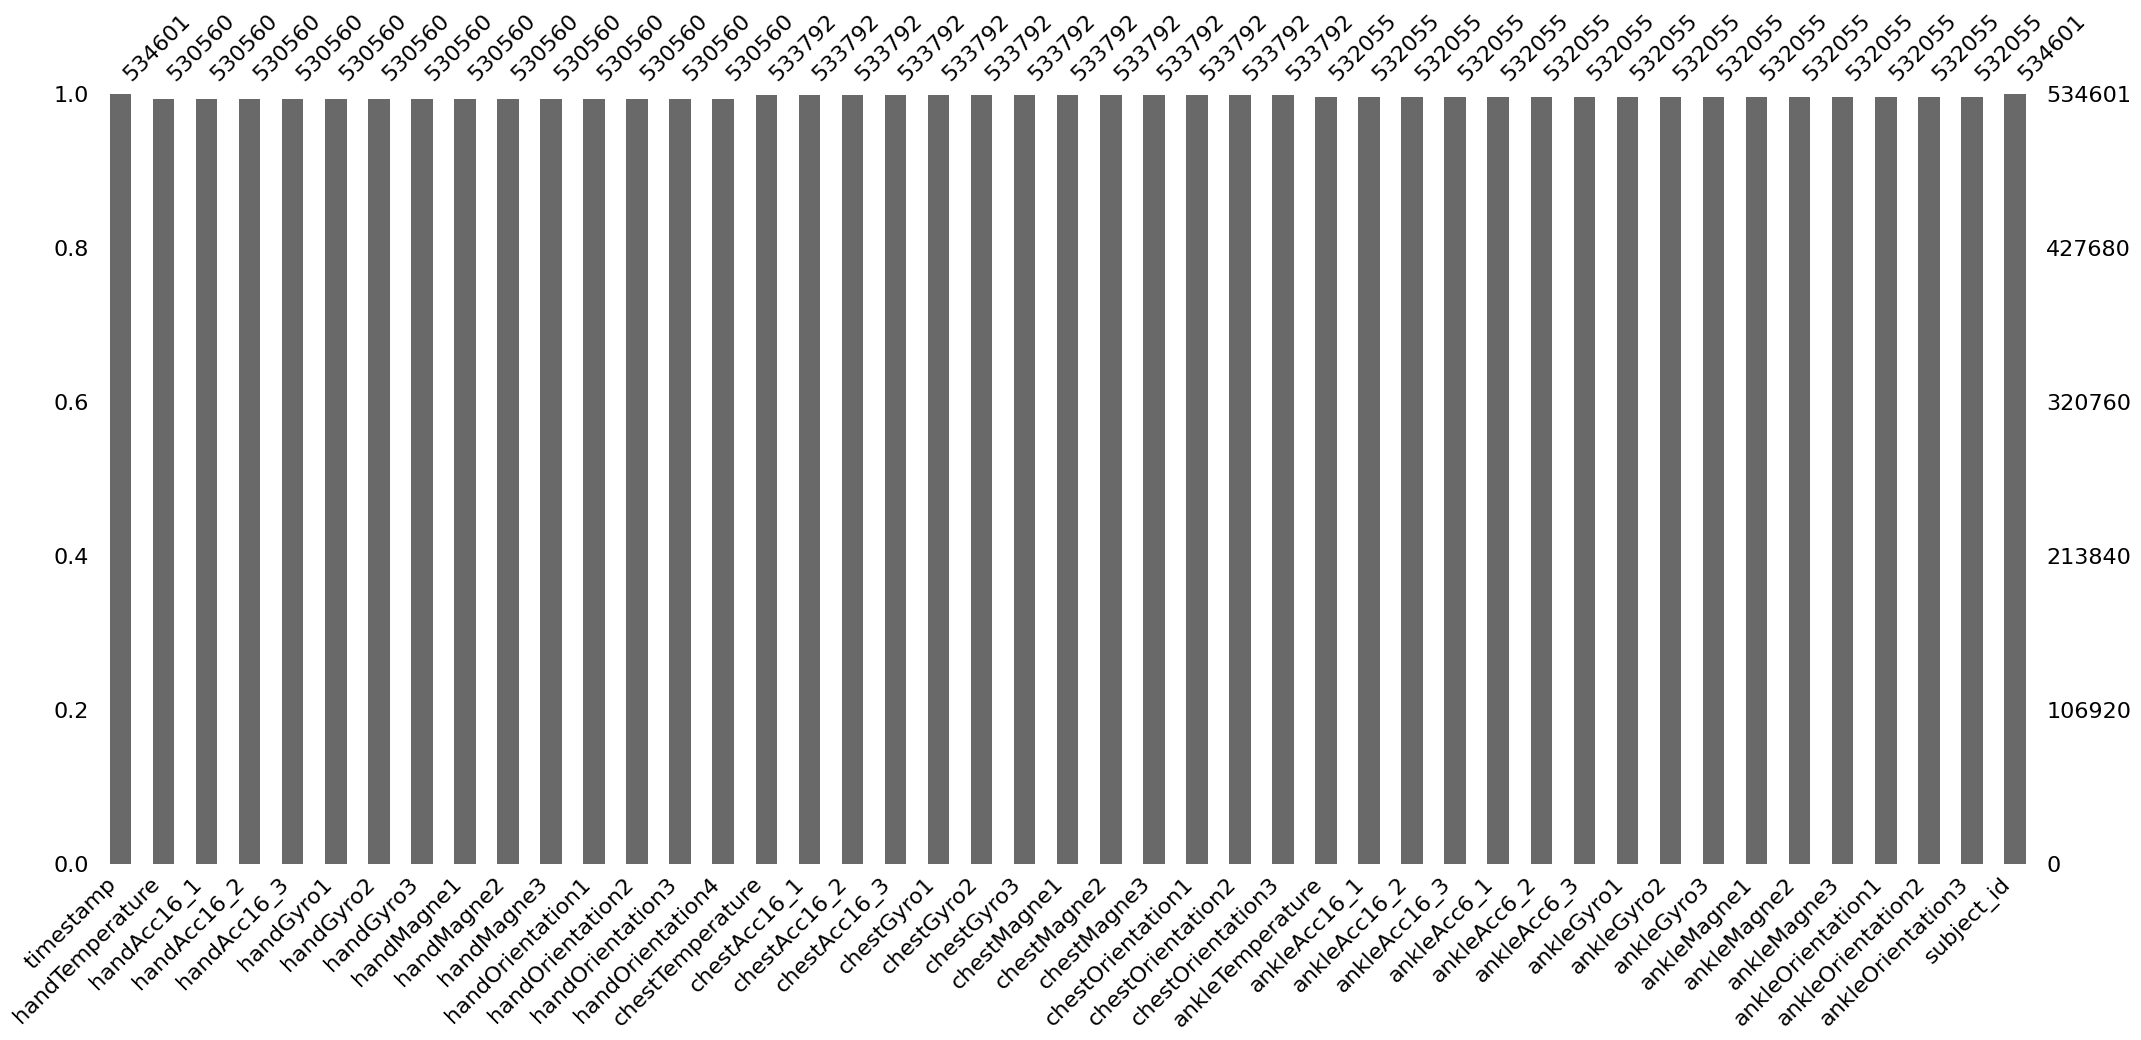

In [11]:
msno.bar(df)

In [12]:
# Заполним пропуски с помощью среднего значения

for i in df.columns:
    df[i].fillna(df[i].mean(), inplace=True)

df.isna().sum()

timestamp            0
handTemperature      0
handAcc16_1          0
handAcc16_2          0
handAcc16_3          0
handGyro1            0
handGyro2            0
handGyro3            0
handMagne1           0
handMagne2           0
handMagne3           0
handOrientation1     0
handOrientation2     0
handOrientation3     0
handOrientation4     0
chestTemperature     0
chestAcc16_1         0
chestAcc16_2         0
chestAcc16_3         0
chestGyro1           0
chestGyro2           0
chestGyro3           0
chestMagne1          0
chestMagne2          0
chestMagne3          0
chestOrientation1    0
chestOrientation2    0
chestOrientation3    0
ankleTemperature     0
ankleAcc16_1         0
ankleAcc16_2         0
ankleAcc16_3         0
ankleAcc6_1          0
ankleAcc6_2          0
ankleAcc6_3          0
ankleGyro1           0
ankleGyro2           0
ankleGyro3           0
ankleMagne1          0
ankleMagne2          0
ankleMagne3          0
ankleOrientation1    0
ankleOrientation2    0
ankleOrient

## Кластеризация

Для кластеризации в данном примере мы будем использовать **KMeans**.

In [13]:
%%time
from sklearn.cluster import KMeans

n_clusters = 10

clusterer = KMeans(n_clusters=n_clusters)

cluster_labels = clusterer.fit_predict(df)

# inertia
inertia = clusterer.inertia_
print("For n_clusters =", n_clusters,
      ", the inertia is :", inertia)

d:\WorkData\SusuRepos\workshop-projects\.venv\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


CPU times: total: 39.8 s
Wall time: 6.54 s


In [15]:
%%time
from sklearn.metrics import silhouette_score

silhouette_avg = silhouette_score(df, cluster_labels)

KeyboardInterrupt: 

**Как оценить качество получившегося кластерного разбиения?**

**Коэффициент Силуэтта**

К-т Силуэтта (англ *Silhouette*) - это метрика, которая не предполагает знания истинных меток объектов, и позволяет оценить качество кластеризации, используя только саму (неразмеченную) выборку и результат кластеризации.

Интуитивное описание метрики:
* точки внутри кластера должны лежать очень близко друг к другу, то есть кластер должен быть *плотным*
* сами кластера должны лежать как можно дальше друг от друга

Метрика силуэта позволяет учитывать оба этих факта в одной формуле.

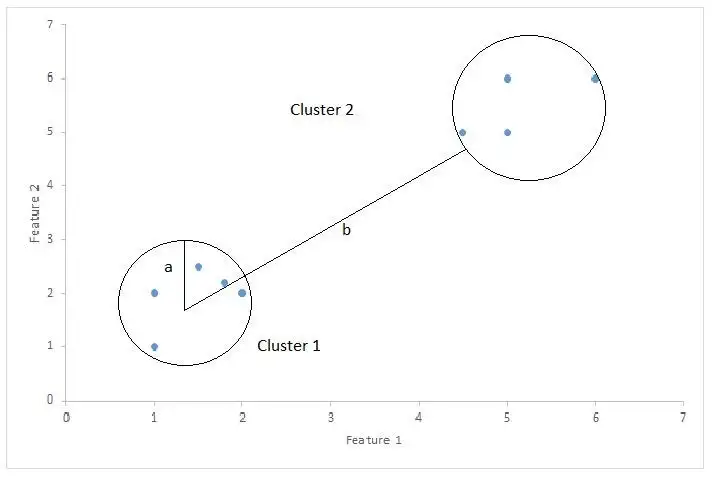

Чтобы вычислить его для каждого объекта нужно вычислить для каждого объекта выборки две величины, $a$ (среднее расстояние от данного объекта до объектов из того же кластера) и $b$ (среднее расстояние от данного объекта до объектов из ближайшего кластера (отличного от того, в котором лежит сам объект)).

Силуэтом объекта назовём нормализованную разность между этими величинами

$$
s = \frac{b-a}{\max(a,b)}
$$

Силуэтом выборки называется средняя величина силуэта объектов данной выборки. Таким образом, силуэт показывает, насколько среднее расстояние до объектов своего кластера отличается от среднего расстояния до объектов других кластеров. Эта величина меняется в интервале от $-1$ до $1$:

* -1 значит что кластера плохие, размытые
* 0 значит что кластера накладываются друг на друга
* 1 значит что кластера плотные и хорошо отделены друг от друга

Таким образом, чем ближе значение к-та Силуэтта в единице, тем лучше. Все, что больше $0.5$ хорошие значения, всё что меньше - надо улучшать.

Формулу реализовывать не надо, она уже есть в *sklearn*. Для примера загрузим наш датасет с кластеризацией:

**Инерция**

Инерция показывает, насколько когерентны различные кластеры.

Вычисляется по следующей формуле:

$inertia = \sum_{i=1}^N (x_i - C_k)$

* N — количество выборок в наборе данных
* C — центр кластера.

Таким образом, Inertia просто вычисляет квадрат расстояния от каждой выборки в кластере до его центра кластера и суммирует их. Этот процесс выполняется для каждого кластера и всех выборок в этом наборе данных. Чем меньше значение Inertia, тем более когерентны различные кластеры. Когда добавляется столько кластеров, сколько имеется выборок в наборе данных, значение инерции будет равно нулю.

In [ ]:
print("For n_clusters =", n_clusters,
      ", the silhouette is :", silhouette_avg)

For n_clusters = 10 , the silhouette is : 0.446297798352115


(53460, 53)


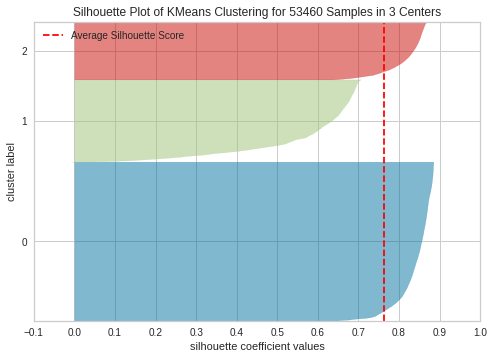

SilhouetteVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7f18cfa91590>,
                     colors='yellowbrick',
                     estimator=KMeans(n_clusters=3, random_state=42))

In [ ]:
from yellowbrick.cluster import silhouette_visualizer

X = df.sample(frac=0.1)
print(X.shape)
silhouette_visualizer(KMeans(3, random_state=42), X, colors='yellowbrick')

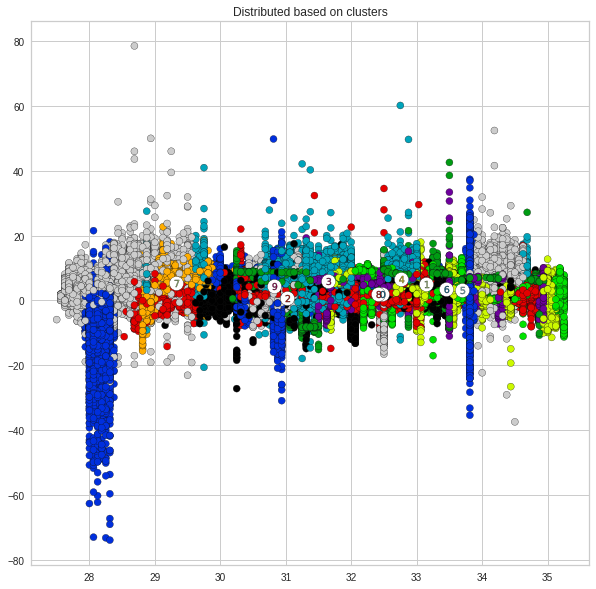

In [ ]:
plt.figure(figsize=(10,10))

plt.scatter(df.iloc[:, 1], df.iloc[:, 4], c=cluster_labels, edgecolor='k')

centers = clusterer.cluster_centers_

plt.scatter(centers[:, 1], centers[:, 4], marker='o',
            c="white", alpha=1, s=200, edgecolor='k')

for i, c in enumerate(centers):
    plt.scatter(c[1], c[4], marker='$%d$' % i, alpha=1,
                s=50, edgecolor='k')

plt.title("Distributed based on clusters");

In [ ]:
import numpy as np

len(np.unique(cluster_labels))

10

## Оптимальное количество кластеров

### Метод локтя

In [ ]:
%%time

inertia_df = pd.DataFrame(data=[], index=range(3, 12), columns=['inertia'])

for n_clusters in range(3, 12):
    clusterer = KMeans(n_clusters=n_clusters,  random_state=42)
    cluster_labels = clusterer.fit_predict(df)

    # inertia
    inertia_df.loc[n_clusters] = clusterer.inertia_

CPU times: user 6min 18s, sys: 20.9 s, total: 6min 39s
Wall time: 3min 54s


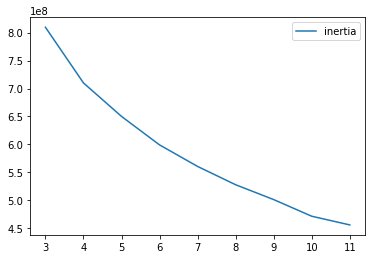

In [ ]:
inertia_df.plot()

In [ ]:
cluster_labels

array([1, 2, 4, ..., 0, 3, 4], dtype=int32)

## Подготовка ответов

In [ ]:
predictions = pd.DataFrame(cluster_labels, columns=['activityID'])
predictions = predictions.reset_index()

predictions

,index,activityID
0,0,4
1,1,7
2,2,1
3,3,3
4,4,1
...,...,...
534596,534596,2
534597,534597,8
534598,534598,8
534599,534599,2


In [ ]:
predictions['activityID'].unique()

array([4, 7, 1, 3, 8, 5, 9, 0, 6, 2], dtype=int32)

**Пример того как преобразовать номера кластеров.**

In [ ]:
import pandas as pd

d = {"f1":pd.Series([100, 20, 3, 5, 200, 400, 2, 282]),
     "f2": pd.Series(['v1', 'v2', 'v3', 'v4', 'v5', 'v6', 'v7', 'v8']),
     "label": pd.Series([2, 0, 1, 1, 2, 0, 1, 2])}


df0 = pd.DataFrame(d)
df0

,f1,f2,label
0,100,v1,2
1,20,v2,0
2,3,v3,1
3,5,v4,1
4,200,v5,2
5,400,v6,0
6,2,v7,1
7,282,v8,2


In [ ]:
df0['label'].unique()

array([2, 0, 1])

In [ ]:
df0['new_label'] = -1

for index, row in df0.iterrows():
    if row['label'] == 2:
        df0.loc[index, 'new_label'] = 1
    if row['label'] == 0:
        df0.loc[index, 'new_label'] = 2
    if row['label'] == 1:
        df0.loc[index, 'new_label'] = 3

df0

,f1,f2,label,new_label
0,100,v1,2,1
1,20,v2,0,2
2,3,v3,1,3
3,5,v4,1,3
4,200,v5,2,1
5,400,v6,0,2
6,2,v7,1,3
7,282,v8,2,1
